# Project Title :Customer Churn Analytics:


# Abstract

In the competitive landscape of telecommunications, customer churn poses a significant challenge, impacting revenue and market share. This project aims to analyze customer churn patterns within a telecom company to understand the underlying factors contributing to customer attrition. The study leverages historical customer data, including demographic information, service usage metrics, and customer interaction logs. Through exploratory data analysis and predictive modeling techniques, key drivers of churn will be identified, such as service dissatisfaction, pricing strategies, contract terms, and customer support effectiveness.

# Problem Statement:



 The objective of this project is to analyze customer churn in a telecom company. Customer churn refers to the phenomenon where customers switch from one service provider to another or cancel their subscription altogether. By analyzing customer chum patterns, we aim to identify the factors that contribute to churn and develop strategies to mitigate it.

# Project Description:


In this project, we will work with a dataset from a telecom company that includes information about their customers, such as demographics, customer Accounting information, Service information. The dataset will also include a churn indicator that specifies nether a customer has churned or not.

Desired problen
come(Objective or goal)The main objective is to find out the reasons for call drops and voice connectivity
Built a classification predictive model to predict call drop


# DesiredOutcome:

our main goal is to  bulid a computer program that can predict when a customer might leave the company

# Algorithms:


LogisticRegression,DecisionTreeClassifier,RandomForestClassifer,AddaboostClassifier,GradientBoostClassifer

# About Data

Data is divided into 3 Types

# Demographic information:

• gender: Whether the customer is a male or a female.

• SeniorCitizen: Whether the customer is a senior citizen or not (1, 0).

• Partner: Whether the customer has a partner or not (Yes, No)

• Dependents : Whether the customer has dependents or not (Yes, No)


# Customer Acconting Information:


• Contract: The contract term of the customer (Month-to-month, One year, Two year)

• PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

• MonthlyCharges: The amount charged to the customer monthly

• TotalCharges: The total amount charged to the customer

• tenure: Number of months the customer has stayed with the company

• PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (au card (automatic))

• customeriD: Customer ID



# Service information

PhoneService: Whether the customer has a phone service or not (yes, No)

• MultipleLines: Whether the customer has multiple lines or not (yes, No, No phone service)

• InternetService: Customer's internet service provider (DSL, Fiber optic, No)

• OnlineSecurity: Whether the customer has online security or not (yes, No, No internet service)

• OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

• DeviceProtection: Whether the customer has device protection or not (yes, No, No internet service)

• TechSupport: Whether the customer has tech support or not (yes, No, No internet service)

• Streaming TV: Whether the customer has streaming TV or not (Yes, No, No internet service)

•StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)




# Traget variable
• Churn: Whether the customer churn or not (yes or No)*

# 1. Data Preparation - (EDA & Feature Engineering -Data Analytics )

In [147]:
#EDA
import numpy as np
import pandas as pd

#data visualations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [148]:
!pip install --upgrade scikit-learn

In [149]:
!pip install --upgrade scikit-learn xgboost

In [150]:
telco_base_data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [151]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [152]:
telco_base_data.shape

(7043, 21)

In [153]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Knowling the unique values

In [154]:
for col in telco_base_data.columns:
    print("column: {} -Unique Values:  {} ".format(col,telco_base_data[col].unique()))

column: customerID -Unique Values:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 
column: gender -Unique Values:  ['Female' 'Male'] 
column: SeniorCitizen -Unique Values:  [0 1] 
column: Partner -Unique Values:  ['Yes' 'No'] 
column: Dependents -Unique Values:  ['No' 'Yes'] 
column: tenure -Unique Values:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
column: PhoneService -Unique Values:  ['No' 'Yes'] 
column: MultipleLines -Unique Values:  ['No phone service' 'No' 'Yes'] 
column: InternetService -Unique Values:  ['DSL' 'Fiber optic' 'No'] 
column: OnlineSecurity -Unique Values:  ['No' 'Yes' 'No internet service'] 
column: OnlineBackup -Unique Values:  ['Yes' 'No' 'No internet service'] 
column: DeviceProtection -Unique Values:  ['No' 'Yes' 'No internet service'] 
column

In [155]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [156]:
telco_base_data.TotalCharges = pd.to_numeric(telco_base_data.TotalCharges, errors='coerce')

In [157]:
telco_base_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [158]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

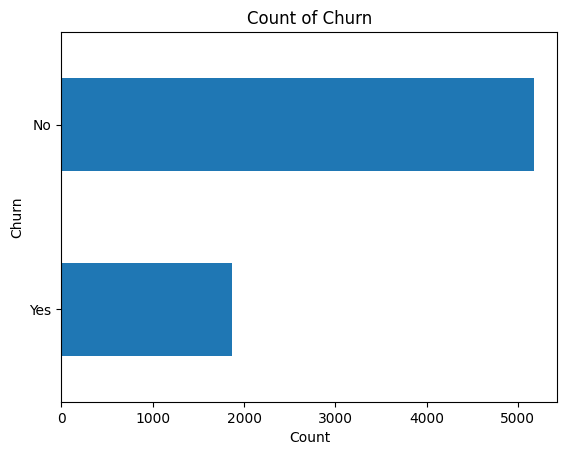

In [159]:
telco_base_data['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Churn")
plt.title("Count of Churn")
plt.gca().invert_yaxis()  # Invert y-axis to have 'No Churn' on top
plt.show()


In [160]:
telco_base_data['Churn'].value_counts()/len(telco_base_data)

,count
Churn,
No,0.73463
Yes,0.26537


In [161]:
telco_base_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [162]:
telco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [163]:
telco_data=telco_base_data.copy()

In [164]:
telco_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [165]:
telco_data.loc[telco_data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [166]:
telco_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [167]:
telco_data.isna().sum()/len(telco_data)

,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


# 4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.0015%, it is safe to ignore them from further processing.


In [168]:
#Removing missing values
telco_data.dropna(how = 'any', inplace = True)

5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [169]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [170]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

telco_data['tenure_group'] = pd.cut(telco_data['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)


In [171]:
 telco_data['tenure_group'].value_counts()



,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


In [172]:
 telco_data['tenure_group'].value_counts()/len(telco_data)

,count
tenure_group,
1 - 12,0.309300
61 - 72,0.200085
13 - 24,0.145620
25 - 36,0.118316
49 - 60,0.118316
37 - 48,0.108362


In [173]:
 telco_data['tenure_group']

,tenure_group
0,1 - 12
1,25 - 36
2,1 - 12
3,37 - 48
4,1 - 12
...,...
7038,13 - 24
7039,61 - 72
7040,1 - 12
7041,1 - 12


In [174]:
telco_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


6. Remove columns not required for processing

In [175]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Data Exploration
*1. * Plot distibution of individual predictors by churn

Univariate Analysis

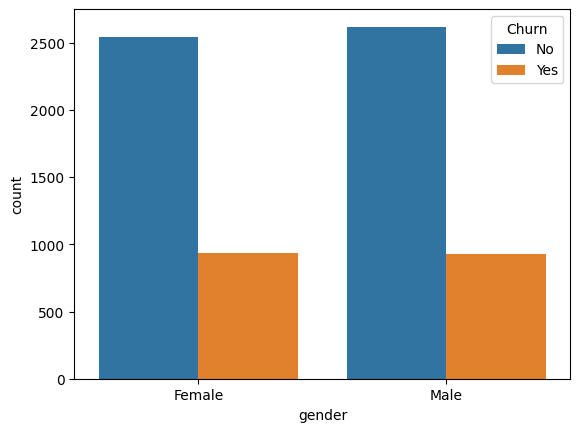

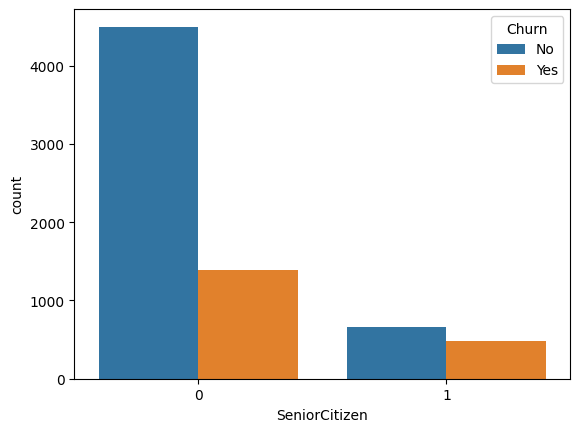

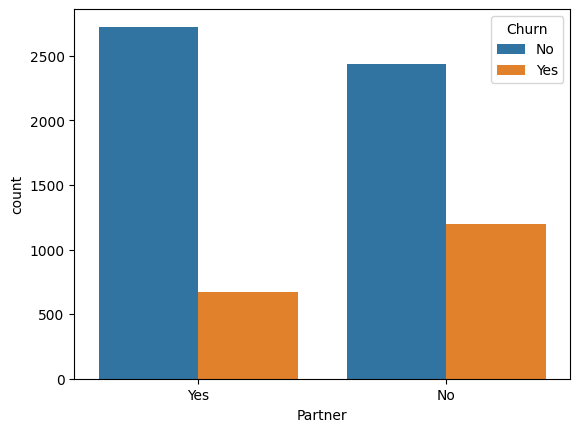

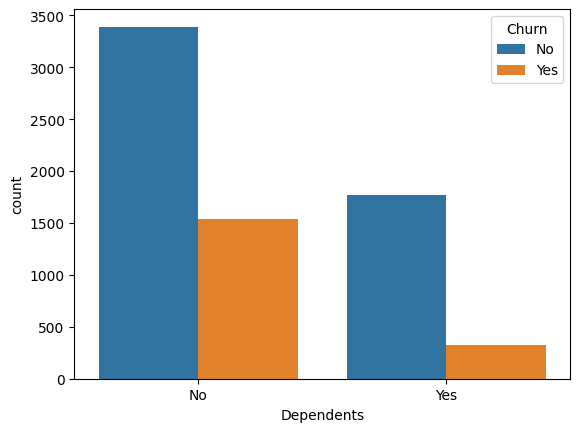

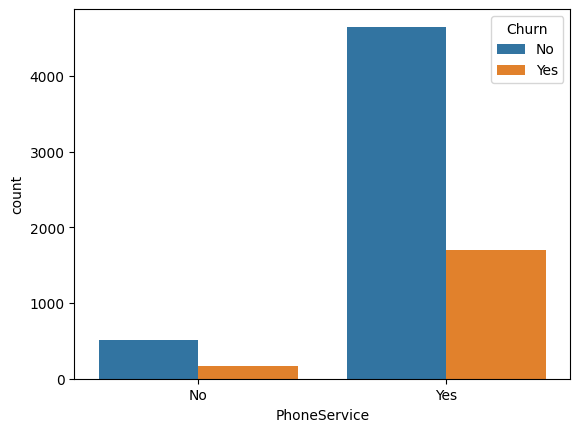

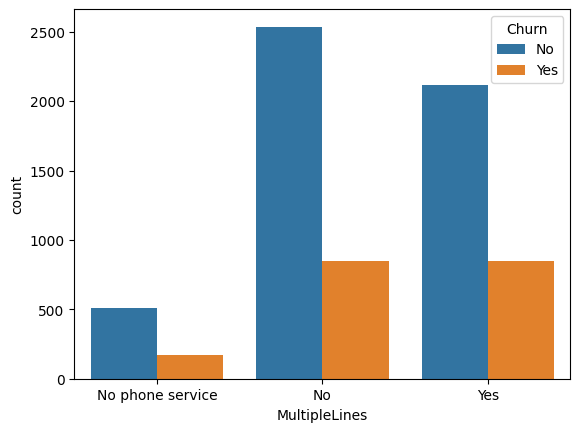

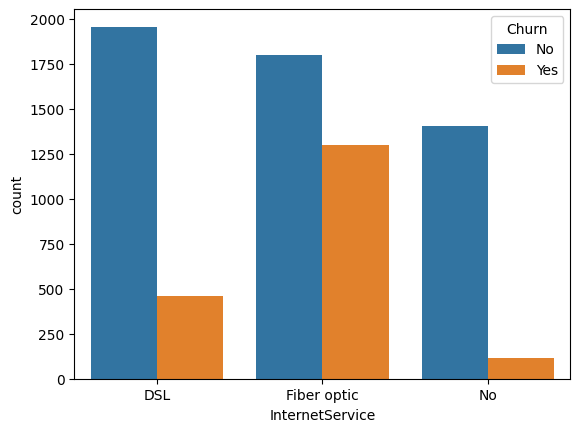

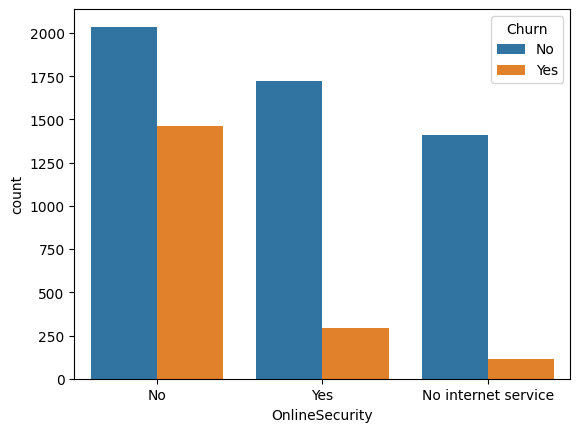

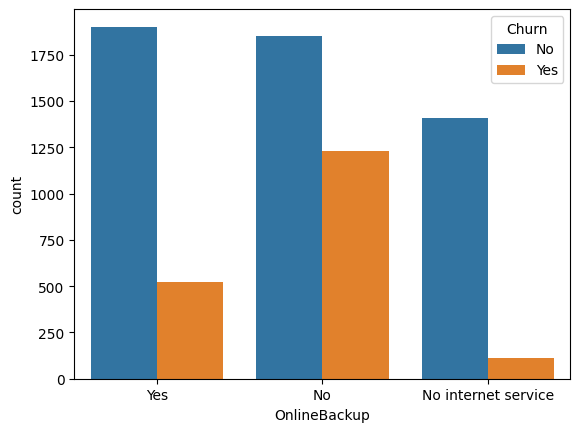

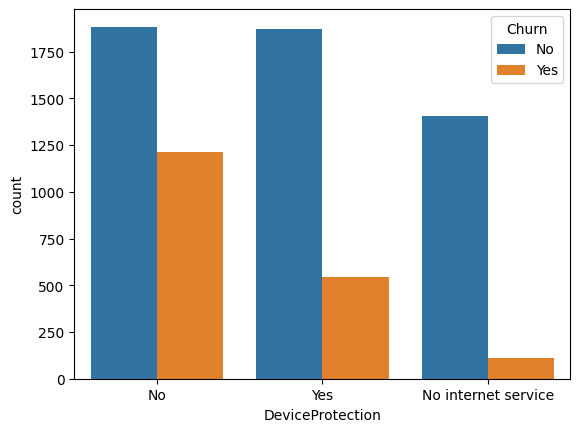

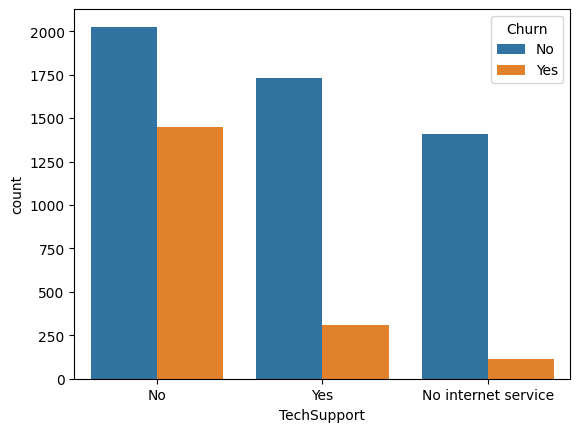

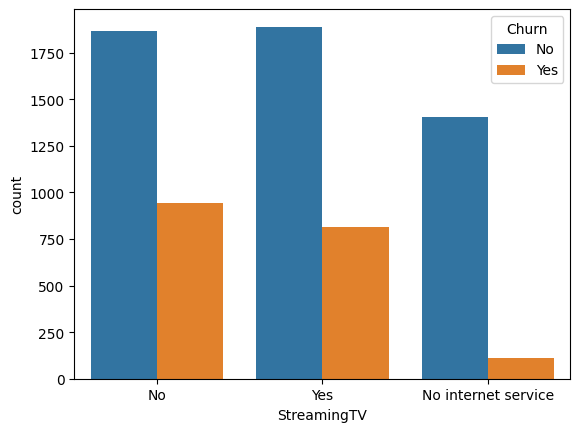

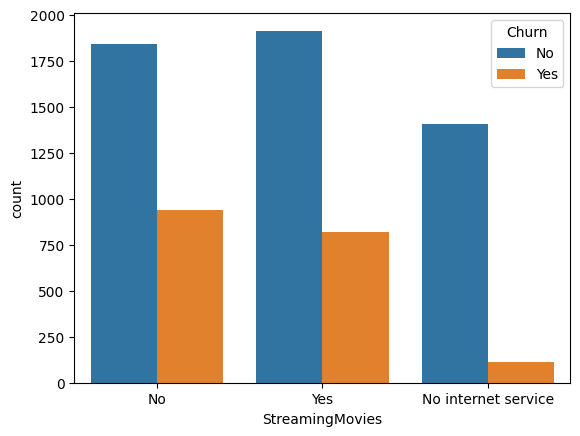

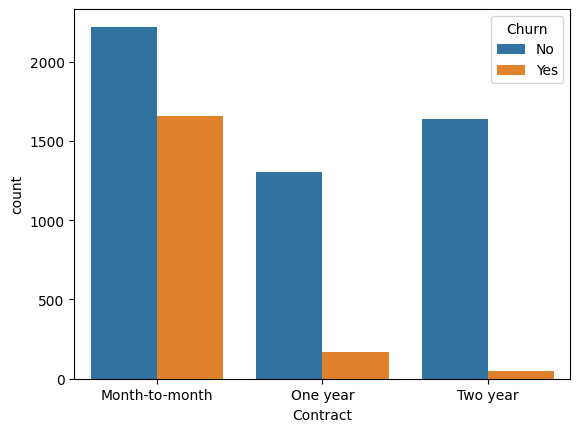

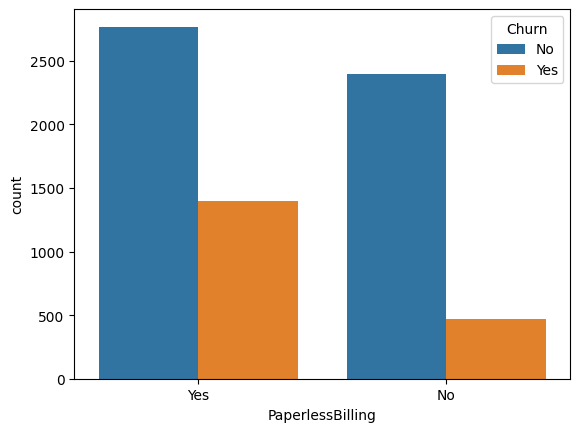

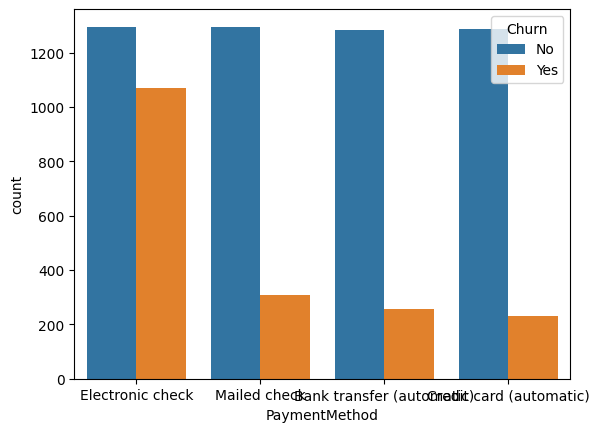

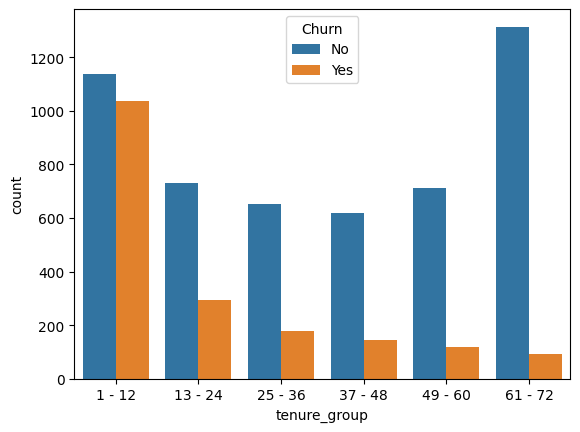

In [176]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [177]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [178]:
telco_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
6782,Female,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,51.10,531.15,0,1 - 12
6122,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.55,280.85,0,13 - 24
2120,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,21.00,1210.30,0,49 - 60


In [179]:
telco_data.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object
DeviceProtection,object


In [180]:
telco_data.loc[telco_data['tenure_group'].isna()==True]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group


In [181]:
telco_data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [182]:
telco_data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [183]:
telco_data
telco_data.info() #convert tenure_group into numerical

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

In [184]:
#telco_data['tenure_group']=pd.to_numeric(telco_data['tenure_group'],errors='coerce')
#telco_base_data.TotalCharges = pd.to_numeric(telco_base_data.TotalCharges, errors='coerce')

In [185]:
telco_data.tenure_group.isna().any()

False

In [186]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

3. Convert all the categorical variables into dummy variables

In [187]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le

LabelEncoder()

In [188]:
categ=['gender','SeniorCitizen','Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn','tenure_group']

for i in categ:
    x=telco_data[i].unique()
    print('unique value of',i,'is', x) #knoing the unique value of the each column for encoding purpose


unique value of gender is ['Female' 'Male']
unique value of SeniorCitizen is [0 1]
unique value of Partner is ['Yes' 'No']
unique value of Dependents is ['No' 'Yes']
unique value of PhoneService is ['No' 'Yes']
unique value of MultipleLines is ['No phone service' 'No' 'Yes']
unique value of InternetService is ['DSL' 'Fiber optic' 'No']
unique value of OnlineSecurity is ['No' 'Yes' 'No internet service']
unique value of OnlineBackup is ['Yes' 'No' 'No internet service']
unique value of DeviceProtection is ['No' 'Yes' 'No internet service']
unique value of TechSupport is ['No' 'Yes' 'No internet service']
unique value of StreamingTV is ['No' 'Yes' 'No internet service']
unique value of StreamingMovies is ['No' 'Yes' 'No internet service']
unique value of Contract is ['Month-to-month' 'One year' 'Two year']
unique value of PaperlessBilling is ['Yes' 'No']
unique value of PaymentMethod is ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
unique valu

In [189]:
import pandas as pd

# Assuming your DataFrame is df

# Gender
telco_data['gender'] = telco_data['gender'].map({'Female': 0, 'Male': 1})

# SeniorCitizen
telco_data['SeniorCitizen'] = telco_data['SeniorCitizen']

# Partner
telco_data['Partner'] = telco_data['Partner'].map({'No': 0, 'Yes': 1})

# Dependents
telco_data['Dependents'] = telco_data['Dependents'].map({'No': 0, 'Yes': 1})

# PhoneService
telco_data['PhoneService'] = telco_data['PhoneService'].map({'No': 0, 'Yes': 1})

# MultipleLines
telco_data['MultipleLines'] = telco_data['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})

# InternetService
telco_data['InternetService'] = telco_data['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})

# OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
# These columns have 'No internet service' which we will map to 0
telco_data['OnlineSecurity'] = telco_data['OnlineSecurity'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
telco_data['OnlineBackup'] = telco_data['OnlineBackup'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
telco_data['DeviceProtection'] = telco_data['DeviceProtection'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
telco_data['TechSupport'] = telco_data['TechSupport'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
telco_data['StreamingTV'] = telco_data['StreamingTV'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
telco_data['StreamingMovies'] = telco_data['StreamingMovies'].map({'No internet service': 0, 'No': 1, 'Yes': 2})

# Contract
telco_data['Contract'] = telco_data['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

# PaperlessBilling
telco_data['PaperlessBilling'] = telco_data['PaperlessBilling'].map({'No': 0, 'Yes': 1})

# PaymentMethod
telco_data['PaymentMethod'] =telco_data['PaymentMethod'].map({
    'Electronic check': 0,
    'Mailed check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
})

# Churn (assuming already encoded as 0 and 1)

# tenure_group
telco_data['tenure_group'] = telco_data['tenure_group'].map({
    '1 - 12': 0,
    '13 - 24': 1,
    '25 - 36': 2,
    '37 - 48': 3,
    '49 - 60': 4,
    '61 - 72': 5
})




In [190]:
telco_data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,0,1,1,2,1,1,1,1,0,1,0,29.85,29.85,0,0
1,1,0,0,0,1,1,1,2,1,2,1,1,1,1,0,1,56.95,1889.50,0,2
2,1,0,0,0,1,1,1,2,2,1,1,1,1,0,1,1,53.85,108.15,1,0
3,1,0,0,0,0,0,1,2,1,2,2,1,1,1,0,2,42.30,1840.75,0,3
4,0,0,0,0,1,1,2,1,1,1,1,1,1,0,1,0,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,1,2,1,2,2,2,2,1,1,1,84.80,1990.50,0,1
7039,0,0,1,1,1,2,2,1,2,2,1,2,2,1,1,3,103.20,7362.90,0,5
7040,0,0,1,1,0,0,1,2,1,1,1,1,1,0,1,0,29.60,346.45,0,0
7041,1,1,1,0,1,2,2,1,1,1,1,1,1,0,1,1,74.40,306.60,1,0


In [191]:

telco_data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [192]:
categ=['gender','SeniorCitizen', 'tenure_group' ,'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn',]

#telco_data[categ] = telco_data[categ].apply(le.fit_transform)

In [193]:
telco_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
955,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,3,44.70,44.70,1,0
3754,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,20.05,20.05,0,0
5663,0,0,1,1,1,2,2,1,1,1,1,2,2,0,1,0,95.25,3314.15,0,3


<Axes: >

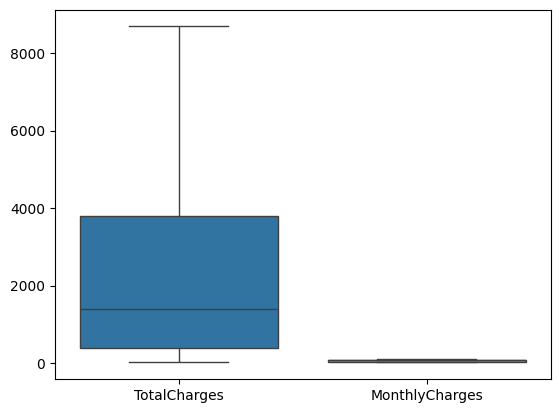

In [194]:
sns.boxplot(data=telco_data[['TotalCharges', 'MonthlyCharges']])

*9. * Relationship between Monthly Charges and Total Charges

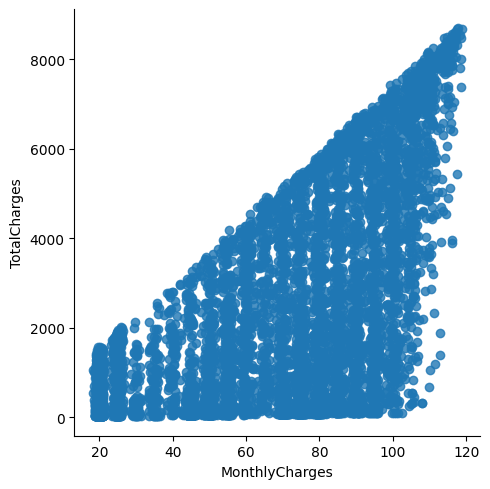

In [195]:
sns.lmplot(data=telco_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

*10. * Churn by Monthly Charges and Total Charges

<ipython-input-196-9210b5b2a170>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 0) ],
<ipython-input-196-9210b5b2a170>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

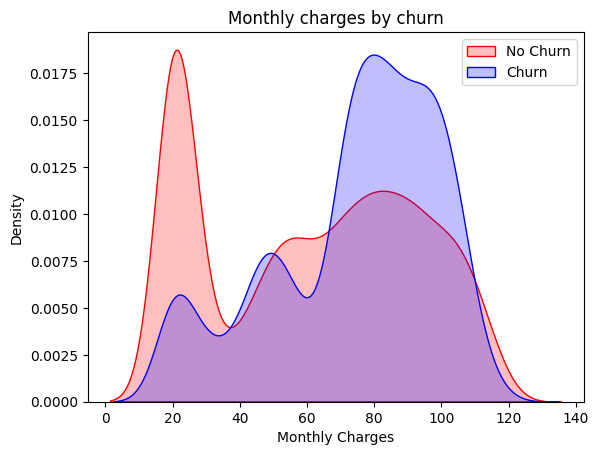

In [196]:
# kernel density estimate (KDE) plot.
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

# Insight: Churn is high when Monthly Charges are high

<ipython-input-197-1b18f000e1a5>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 0) ],
<ipython-input-197-1b18f000e1a5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

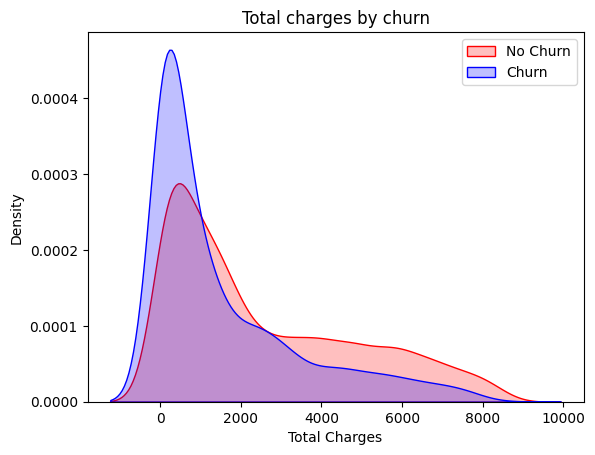

In [197]:
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

*11. Build a corelation of all predictors with 'Churn' *

<Axes: >

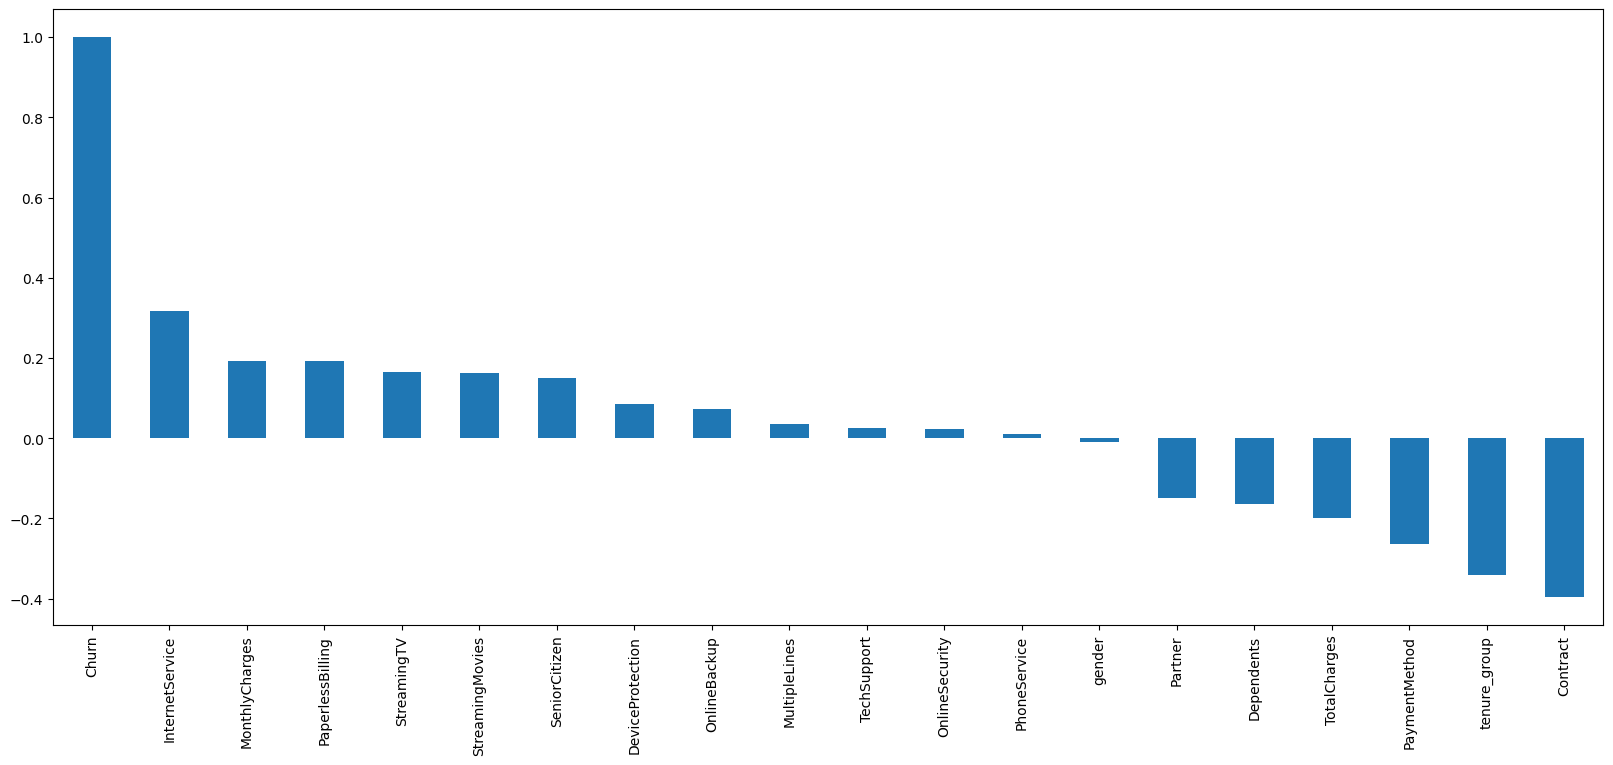

In [198]:
plt.figure(figsize=(20,8))
telco_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

*Derived Insight: *

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<Axes: >

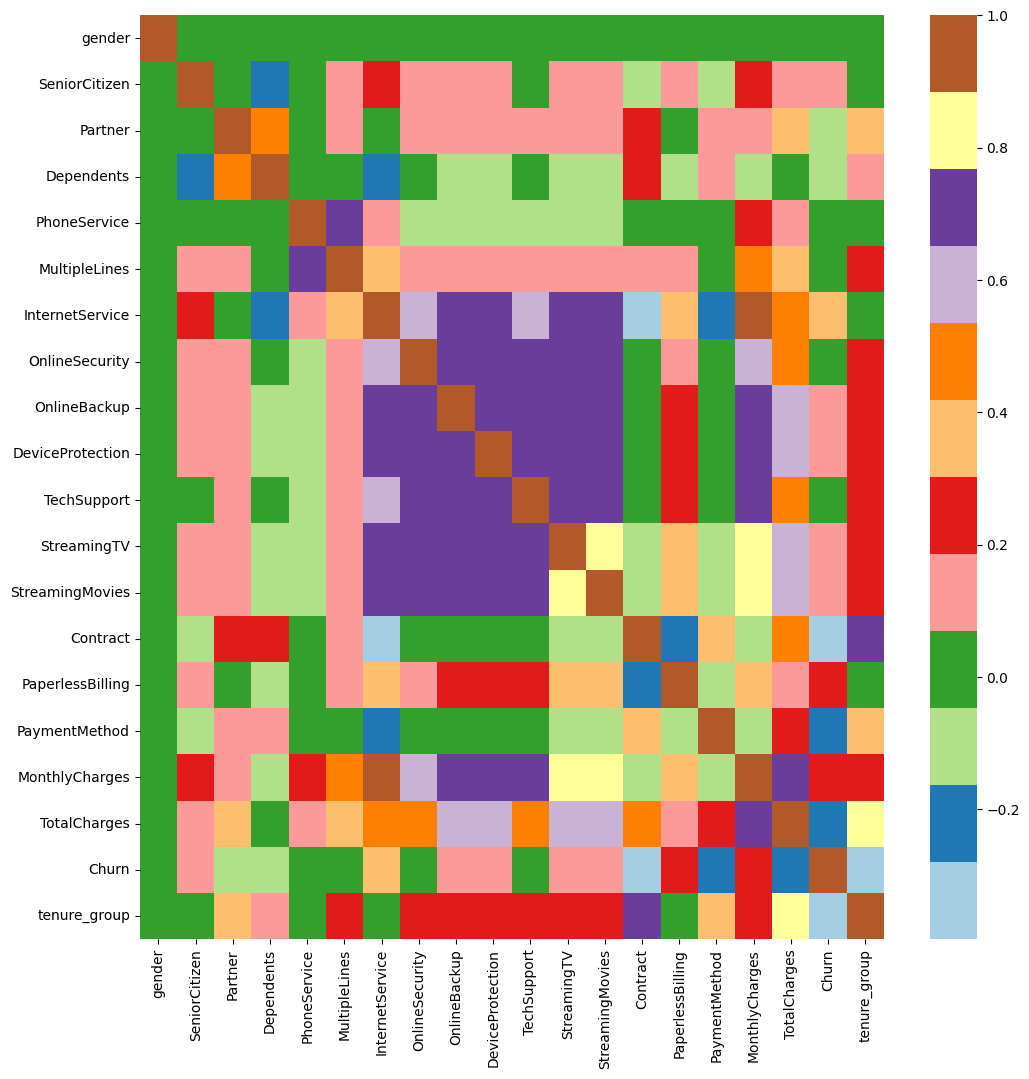

In [199]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data.corr(), cmap="Paired")

Bivariate Analysis

In [200]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [201]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

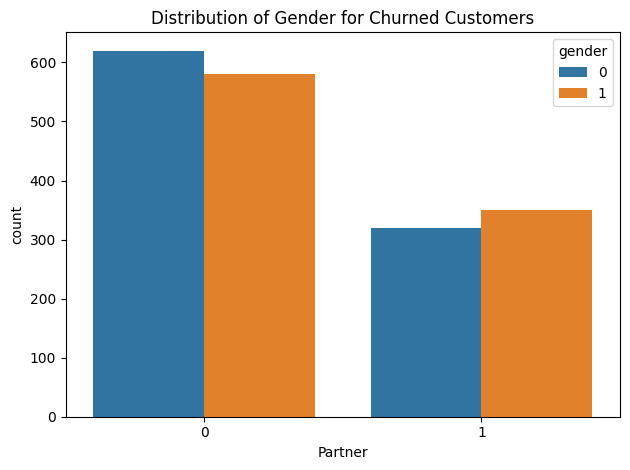

In [202]:
#uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')
import seaborn as sns

import seaborn as sns

sns.countplot(x='Partner', hue='gender', data=new_df1_target1)
plt.title('Distribution of Gender for Churned Customers')
plt.tight_layout()
plt.show()


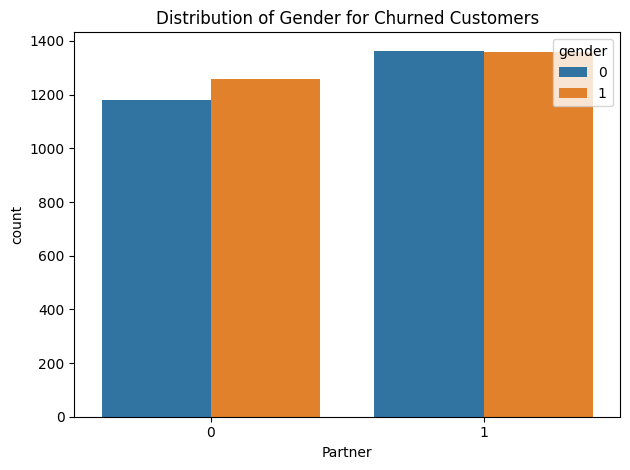

In [203]:
#uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')
sns.countplot(x='Partner', hue='gender', data=new_df1_target0)
plt.title('Distribution of Gender for Churned Customers')
plt.tight_layout()
plt.show()

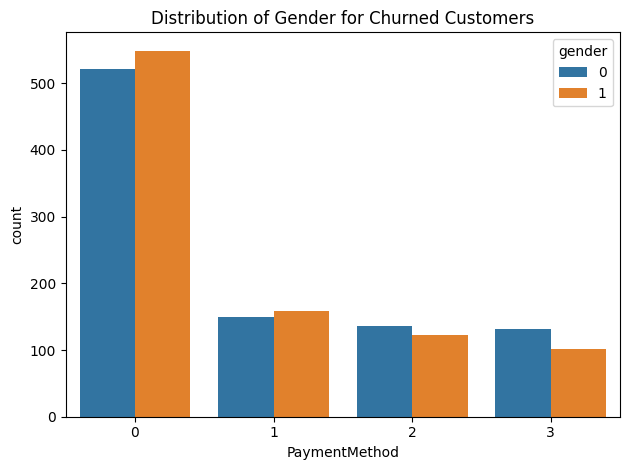

In [204]:
#uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')
sns.countplot(x='PaymentMethod', hue='gender', data=new_df1_target1)
plt.title('Distribution of Gender for Churned Customers')
plt.tight_layout()
plt.show()

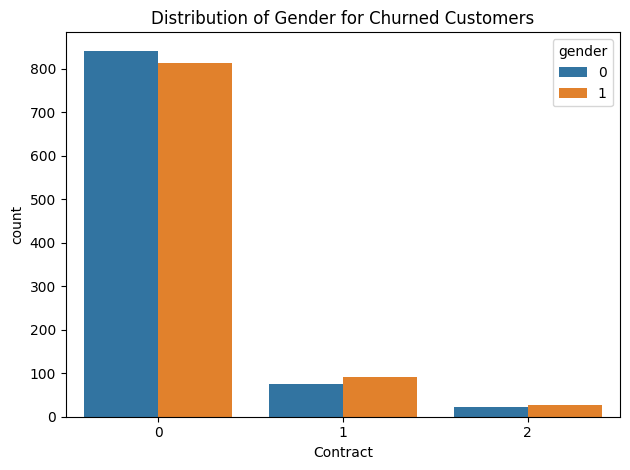

In [205]:
#uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')
sns.countplot(x='Contract', hue='gender', data=new_df1_target1)
plt.title('Distribution of Gender for Churned Customers')
plt.tight_layout()
plt.show()


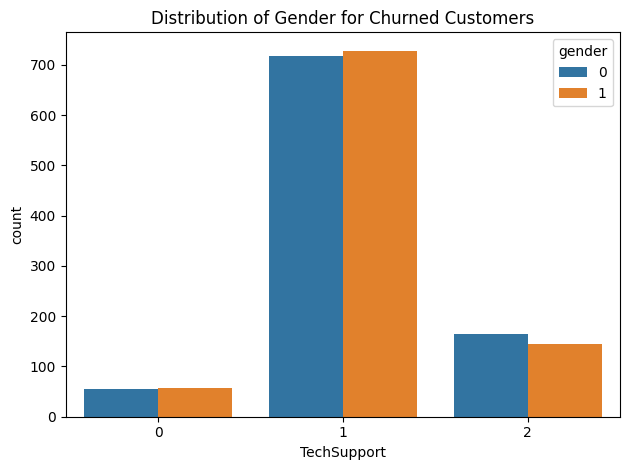

In [206]:
#uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')
sns.countplot(x='TechSupport', hue='gender', data=new_df1_target1)
plt.title('Distribution of Gender for Churned Customers')
plt.tight_layout()
plt.show()

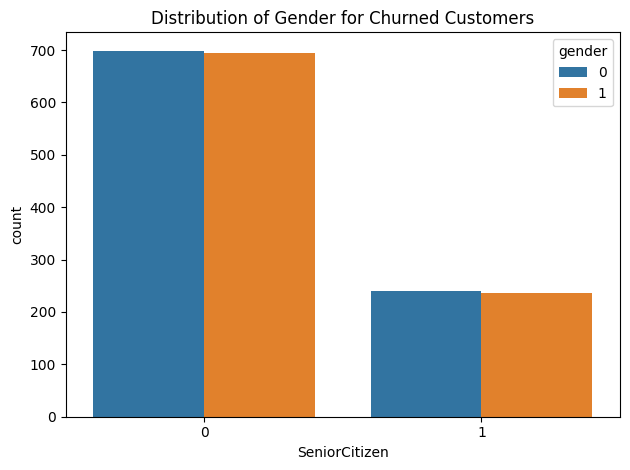

In [207]:
#uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')
sns.countplot(x='SeniorCitizen', hue='gender', data=new_df1_target1)
plt.title('Distribution of Gender for Churned Customers')
plt.tight_layout()
plt.show()

In [208]:
X=telco_data.drop('Churn',axis=1)
y=telco_data['Churn']

In [209]:
X.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [210]:
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,0,0,1,0,0,0,1,1,2,1,1,1,1,0,1,0,29.85,29.85,0
1,1,0,0,0,1,1,1,2,1,2,1,1,1,1,0,1,56.95,1889.50,2
2,1,0,0,0,1,1,1,2,2,1,1,1,1,0,1,1,53.85,108.15,0
3,1,0,0,0,0,0,1,2,1,2,2,1,1,1,0,2,42.30,1840.75,3
4,0,0,0,0,1,1,2,1,1,1,1,1,1,0,1,0,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,1,2,1,2,2,2,2,1,1,1,84.80,1990.50,1
7039,0,0,1,1,1,2,2,1,2,2,1,2,2,1,1,3,103.20,7362.90,5
7040,0,0,1,1,0,0,1,2,1,1,1,1,1,0,1,0,29.60,346.45,0
7041,1,1,1,0,1,2,2,1,1,1,1,1,1,0,1,1,74.40,306.60,0


In [211]:
telco_data['Churn'].value_counts()/len(telco_data) #data is highly imbalancing

,count
Churn,
0,0.734215
1,0.265785


Train Test Split

In [212]:
from sklearn.model_selection  import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [213]:
print('Traing data shape')

print(X_train.shape)
print(y_train.shape)




print('Testing Data shape')

print(X_test.shape)
print(y_test.shape)

Traing data shape
(5625, 19)
(5625,)
Testing Data shape
(1407, 19)
(1407,)


In [214]:
print(y_test.value_counts())

print(y_train.value_counts())

Churn
0    1033
1     374
Name: count, dtype: int64
Churn
0    4130
1    1495
Name: count, dtype: int64


In [215]:
from sklearn.tree import DecisionTreeClassifier



In [216]:
model_dtc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [217]:
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [218]:
model_dtc.score(X_test,y_test)

0.7668798862828714

In [219]:
y_pred=model_dtc.predict(X_test)
y_pred[:10]

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [220]:
print(y_test[:10])

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64


In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



In [222]:
y.isna().any()

False

In [223]:
telco_data['tenure_group'].value_counts()#/len(telco_data)

,count
tenure_group,
0,2175
5,1407
1,1024
2,832
4,832
3,762


In [224]:
telco_data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


''' As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)'''


'''main advantage of using SMOTEENN is that it addresses both overfitting and underfitting issues that can arise from class imbalance. By generating synthetic samples and removing noisy ones'''


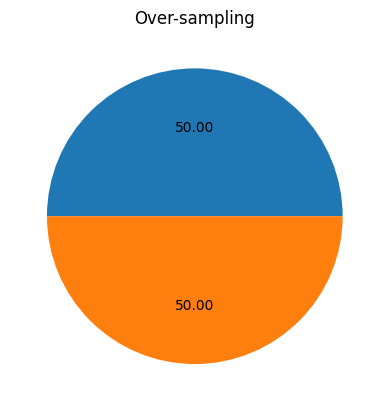

In [225]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()

#X_ovs,y_ovs=smote.fit_resample(X,y)

X_ovs, y_ovs = smote.fit_resample(X, y)

fig, oversp = plt.subplots()
oversp.pie( y_ovs.value_counts(), autopct='%.2f')
oversp.set_title("Over-sampling")
plt.show()


In [226]:
X_ovs.isna().sum()
X_ovs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10326 entries, 0 to 10325
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            10326 non-null  int64   
 1   SeniorCitizen     10326 non-null  int64   
 2   Partner           10326 non-null  int64   
 3   Dependents        10326 non-null  int64   
 4   PhoneService      10326 non-null  int64   
 5   MultipleLines     10326 non-null  int64   
 6   InternetService   10326 non-null  int64   
 7   OnlineSecurity    10326 non-null  int64   
 8   OnlineBackup      10326 non-null  int64   
 9   DeviceProtection  10326 non-null  int64   
 10  TechSupport       10326 non-null  int64   
 11  StreamingTV       10326 non-null  int64   
 12  StreamingMovies   10326 non-null  int64   
 13  Contract          10326 non-null  int64   
 14  PaperlessBilling  10326 non-null  int64   
 15  PaymentMethod     10326 non-null  int64   
 16  MonthlyCharges    1032

In [227]:
# Importing necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming X_ovs['tenure_group'] is the column needing imputation
imputer = SimpleImputer(strategy='median')

# Reshape the data to fit the imputer if necessary (depends on data structure)
X_ovs['tenure_group'] = imputer.fit_transform(X_ovs[['tenure_group']])

# If necessary, convert the result back to a DataFrame
X_ovs['tenure_group'] = pd.DataFrame(X_ovs['tenure_group'])

# Verify that missing values have been filled
X_ovs['tenure_group'].isnull().sum()  # Should return 0 if successful


0

In [228]:
X_ovs['tenure_group'].median()

1.0

In [229]:
telco_data['tenure_group'].value_counts()

,count
tenure_group,
0,2175
5,1407
1,1024
2,832
4,832
3,762


In [230]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_ovs, y_ovs,test_size=0.2,random_state=42)

In [231]:

from sklearn.linear_model  import LogisticRegression

model_lr=LogisticRegression(max_iter=100)


In [232]:
model_lr.fit(Xr_train,yr_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:
y_pred=model_lr.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [234]:
model_lr.score(Xr_test,yr_test)

0.8063891577928364

In [235]:
from sklearn.metrics import accuracy_score, classification_report


report = classification_report(y_pred, yr_test, labels=[0, 1])

print(report)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       969
           1       0.84      0.79      0.81      1097

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



In [236]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yr_test,y_pred)

array([[803, 234],
       [166, 863]])

Decision Tree classifier

In [237]:
from sklearn.tree import DecisionTreeClassifier

model_dtc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [238]:
model_dtc.fit(Xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [239]:
y_pred=model_dtc.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [240]:
yr_test[:10]

,Churn
4139,1
1692,0
2692,0
7704,1
321,0
9752,1
39,1
3813,0
7396,1
2613,0


In [241]:
model_dtc.score(Xr_test,yr_test)

0.8034849951597289

In [242]:
print(classification_report(yr_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1037
           1       0.78      0.85      0.81      1029

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



In [243]:
confusion_matrix(yr_test,y_pred)

array([[789, 248],
       [158, 871]])

Random Forest Classifier

In [244]:
from sklearn.ensemble import RandomForestClassifier

model_rfc=RandomForestClassifier(n_estimators=100, random_state = 100,max_depth=6, min_samples_leaf=8,class_weight='balanced')

In [245]:
Xr_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'tenure_group'],
      dtype='object')

In [246]:
model_rfc.fit(Xr_train,yr_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [247]:
y_pred=model_rfc.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [248]:
yr_test[:10]

,Churn
4139,1
1692,0
2692,0
7704,1
321,0
9752,1
39,1
3813,0
7396,1
2613,0


In [249]:
model_rfc.score(Xr_test,yr_test)

0.8247821878025169

In [250]:
report_rfc=classification_report(y_pred,yr_test)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       935
           1       0.87      0.79      0.83      1131

    accuracy                           0.82      2066
   macro avg       0.82      0.83      0.82      2066
weighted avg       0.83      0.82      0.83      2066



In [251]:
confusion_matrix(yr_test,y_pred)

array([[805, 232],
       [130, 899]])

AdaBoost

In [252]:
from sklearn.ensemble import  AdaBoostClassifier

In [253]:
model_abc=AdaBoostClassifier(n_estimators=100)

In [254]:
model_abc.fit(Xr_train,yr_train)

AdaBoostClassifier(n_estimators=100)

In [255]:
y_pred=model_abc.predict(Xr_test)

In [256]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       936
           1       0.87      0.79      0.83      1130

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [257]:
confusion_matrix(yr_test,y_pred)

array([[800, 237],
       [136, 893]])

GradientBoostingClassifer

In [258]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier()
model_gbc



GradientBoostingClassifier()

In [259]:
model_gbc.fit(Xr_train,yr_train)

GradientBoostingClassifier()

In [260]:
y_pred_gbc=model_gbc.predict(Xr_test)
y_pred_gbc[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [261]:
yr_test[:10]

,Churn
4139,1
1692,0
2692,0
7704,1
321,0
9752,1
39,1
3813,0
7396,1
2613,0


In [262]:
print(classification_report(y_pred_gbc,yr_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       973
           1       0.86      0.81      0.83      1093

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [263]:
confusion_matrix(yr_test,y_pred)

array([[800, 237],
       [136, 893]])

Xgboost

In [264]:
!pip install xgboost

In [265]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(class_weight={0:1, 1:2})

In [266]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize XGBClassifier
model = XGBClassifier(scale_pos_weight=scale_pos_weight)


In [268]:
model_xgb.fit(Xr_train,yr_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [269]:
y_pred=model_xgb.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [270]:
yr_test[:10]

,Churn
4139,1
1692,0
2692,0
7704,1
321,0
9752,1
39,1
3813,0
7396,1
2613,0


In [271]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1014
           1       0.85      0.84      0.84      1052

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [272]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(yr_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[864 173]
 [150 879]]


finding the best hyperparameter fro XGBclassifier

In [273]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time

# Define your GradientBoostingClassifier and param_dist
model = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.5],  # Step size shrinkage used in update
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}
# Create RandomizedSearchCV object with fewer iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=5, cv=10, scoring='accuracy', random_state=42)

# Start the timer
start_time = time.time()

# Fit the RandomizedSearchCV object
random_search.fit(Xr_train, yr_train)

# Stop the timer
end_time = time.time()

# Calculate the total time taken
total_time = end_time - start_time

print("RandomizedSearchCV took {:.2f} seconds to complete.".format(total_time))

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

# final model

In [274]:
from xgboost import XGBClassifier

# Define the best hyperparameters obtained from GridSearchCV
best_params = {
   'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8


}

# Create Gradient Boosting Classifier with the best hyperparameters
final_XGB_classifier = XGBClassifier(**best_params)

# Train the final model on the entire training data
final_XGB_classifier.fit(Xr_train, yr_train)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [275]:
from sklearn.model_selection import cross_val_score

# trained model with tuned hyperparameters
# X_train and y_train are your training data
# cv=10 indicates 10-fold cross-validation
cv_scores = cross_val_score(final_XGB_classifier, Xr_train, yr_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [276]:
y_pred=final_XGB_classifier.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [277]:
yr_test[:10]

,Churn
4139,1
1692,0
2692,0
7704,1
321,0
9752,1
39,1
3813,0
7396,1
2613,0


In [278]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1025
           1       0.85      0.84      0.84      1041

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [279]:
confusion_matrix(y_pred,yr_test)

array([[866, 159],
       [171, 870]])

Electronic check medium are the highest churners

Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

No Online security, No Tech Support category are high churners

Non senior Citizens are high churners

Pickle file

In [280]:
from xgboost import XGBClassifier
import joblib

# Assuming grid_search contains the best trained model from GridSearchCV
# Define the XGBoost classifier with best parameters
final_XGB_classifier = XGBClassifier(
    objective='binary:logistic',
    subsample=0.8,
    n_estimators=200,
    min_child_weight=5,
    max_depth=7,
    learning_rate=0.1,
    gamma=0,
    colsample_bytree=0.8,
    random_state=42  # Ensure reproducibility
)
# Fit the classifier on your data (assuming X_train, y_train are defined)
final_XGB_classifier.fit(Xr_train, yr_train)

# Save the model to a file
joblib.dump(final_XGB_classifier, 'final_xgb_model.pkl')


# Load the model from the file
loaded_model = joblib.load('final_xgb_model.pkl')

# Use the loaded model to make predictions
y_pred = loaded_model.predict(Xr_test)

y_pred

array([1, 0, 0, ..., 1, 0, 0])

Checking accuravy with our features


In [281]:
import pickle
import pandas as pd

# Load the saved model from the pickle file
with open('final_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prepare your own data for testing
# Create a DataFrame with your feature data
your_features = pd.DataFrame({
    'gender': [1, 0, 0, 0, 0],
    'SeniorCitizen': [0, 0, 0, 0, 0],
    'Partner': [0, 0, 0, 1, 1],
    'Dependents': [0, 0, 0, 0, 1],
    'PhoneService': [1, 0, 1, 1, 1],
    'MultipleLines': [0, 0, 0, 2, 2],
    'InternetService': [1, 0, 1, 1, 0],
    'OnlineSecurity': [0, 0, 0, 2, 2],
    'OnlineBackup': [0, 0, 1, 2, 2],
    'DeviceProtection': [0, 0, 0, 0, 2],
    'TechSupport': [0, 0, 0, 2, 2],
    'StreamingTV': [0, 1, 0, 0, 0],
    'StreamingMovies': [0, 1, 0, 0, 0],
    'Contract': [2, 0, 0, 1, 2],
    'PaperlessBilling': [0, 1, 0, 0, 0],
    'PaymentMethod': [1, 1, 1, 0, 0],
    'MonthlyCharges': [90.407734, 58.273891, 74.379767, 108.55, 64.35],
    'TotalCharges': [707.535237, 3264.466697, 1146.937795, 5610.7, 1558.65],
    'tenure_group': [0, 4, 1, 4, 2]
})

# Make predictions using the loaded model on your own data
predictions = loaded_model.predict(your_features)

# Print the predictions
print("Predictions:", predictions)


Predictions: [1 1 1 1 0]


In [282]:
import pickle
import pandas as pd

# Load the saved model from the pickle file
with open('final_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prepare your own data for testing
# Create a DataFrame with your feature data
your_features = pd.DataFrame({
    'gender': [1, 0, 0, 0, 0],
    'SeniorCitizen': [0, 0, 0, 0, 0],
    'Partner': [0, 0, 0, 1, 1],
    'Dependents': [0, 0, 0, 0, 1],
    'PhoneService': [1, 0, 1, 1, 1],
    'MultipleLines': [0, 0, 0, 2, 2],
    'InternetService': [1, 0, 1, 1, 0],
    'OnlineSecurity': [0, 0, 0, 2, 2],
    'OnlineBackup': [0, 0, 1, 2, 2],
    'DeviceProtection': [0, 0, 0, 0, 2],
    'TechSupport': [0, 0, 0, 2, 2],
    'StreamingTV': [0, 1, 0, 0, 0],
    'StreamingMovies': [0, 1, 0, 0, 0],
    'Contract': [2, 0, 0, 1, 2],
    'PaperlessBilling': [0, 1, 0, 0, 0],
    'PaymentMethod': [1, 1, 1, 0, 0],
    'MonthlyCharges': [90.407734, 58.273891, 74.379767, 108.55, 64.35],
    'TotalCharges': [707.535237, 3264.466697, 1146.937795, 5610.7, 1558.65],
    'tenure_group': [0, 4, 1, 4, 2]
})

# Make predictions using the loaded model on your own data
predictions = loaded_model.predict(your_features)

# Map predictions to human-readable labels
predicted_labels = ['Not Churn' if pred == 0 else 'Churn' for pred in predictions]

# Create a DataFrame with predictions
predictions_df = pd.DataFrame({
    'Prediction': predicted_labels
})

# Combine original data with predictions
output_df = pd.concat([your_features, predictions_df], axis=1)

# Print the output
print(output_df)


   gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       1              0        0           0             1              0   
1       0              0        0           0             0              0   
2       0              0        0           0             1              0   
3       0              0        1           0             1              2   
4       0              0        1           1             1              2   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                1               0             0                 0   
1                0               0             0                 0   
2                1               0             1                 0   
3                1               2             2                 0   
4                0               2             2                 2   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0       

In [283]:
import pickle
import pandas as pd

# Load the saved model from the pickle file
with open('final_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prepare your own data for testing
# Create a DataFrame with your feature data

your_features = pd.DataFrame({
    'gender': [1, 0, 0, 0, 0],  # 1 for Male, 0 for Female
    'SeniorCitizen': [0, 0, 0, 0, 0],  # 1 for Senior Citizen, 0 for Not Senior Citizen
    'Partner': [0, 0, 0, 1, 1],  # 1 for Yes, 0 for No (whether the customer has a partner)
    'Dependents': [0, 0, 0, 0, 1],  # 1 for Yes, 0 for No (whether the customer has dependents)
    'PhoneService': [1, 0, 1, 1, 1],  # 1 for Yes, 0 for No (whether the customer has phone service)
    'MultipleLines': [0, 0, 0, 2, 2],  # 0 for No phone service, 1 for No multiple lines, 2 for Multiple lines
    'InternetService': [1, 0, 1, 1, 0],  # 0 for No internet service, 1 for DSL, 2 for Fiber optic
    'OnlineSecurity': [0, 0, 0, 2, 2],  # 0 for No internet service, 1 for No online security, 2 for Yes online security
    'OnlineBackup': [0, 0, 1, 2, 2],  # 0 for No internet service, 1 for No online backup, 2 for Yes online backup
    'DeviceProtection': [0, 0, 0, 0, 2],  # 0 for No internet service, 1 for No device protection, 2 for Yes device protection
    'TechSupport': [0, 0, 0, 2, 2],  # 0 for No internet service, 1 for No tech support, 2 for Yes tech support
    'StreamingTV': [0, 1, 0, 0, 0],  # 0 for No internet service, 1 for No streaming TV, 2 for Yes streaming TV
    'StreamingMovies': [0, 1, 0, 0, 0],  # 0 for No internet service, 1 for No streaming movies, 2 for Yes streaming movies
    'Contract': [2, 0, 0, 1, 2],  # 0 for Month-to-month, 1 for One year, 2 for Two year
    'PaperlessBilling': [0, 1, 0, 0, 0],  # 1 for Yes, 0 for No (whether the customer uses paperless billing)
    'PaymentMethod': [1, 1, 1, 0, 0],  # 0 for Electronic check, 1 for Mailed check, 2 for Bank transfer (automatic), 3 for Credit card (automatic)
    'MonthlyCharges': [90.407734, 58.273891, 74.379767, 108.55, 64.35],  # Monthly charges
    'TotalCharges': [707.535237, 3264.466697, 1146.937795, 5610.7, 1558.65],  # Total charges over customer tenure
    'tenure_group': [0, 4, 1, 4, 2]  # Tenure group categories
})

# Make predictions using the loaded model on your own data
predictions = loaded_model.predict(your_features)

# Map predictions to human-readable labels
predicted_labels = ['Not Churn' if pred == 0 else 'Churn' for pred in predictions]

# Create a DataFrame with predictions
predictions_df = pd.DataFrame({
    'Prediction': predicted_labels
})

# Combine original data with predictions
output_df = pd.concat([your_features, predictions_df], axis=1)

# Print the output
print(output_df)


   gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       1              0        0           0             1              0   
1       0              0        0           0             0              0   
2       0              0        0           0             1              0   
3       0              0        1           0             1              2   
4       0              0        1           1             1              2   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                1               0             0                 0   
1                0               0             0                 0   
2                1               0             1                 0   
3                1               2             2                 0   
4                0               2             2                 2   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0       

In [284]:
import pickle
import pandas as pd

# Load the saved model from the pickle file
with open('final_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prepare your own data for testing
# Create a DataFrame with your feature data

your_features = pd.DataFrame({
    'gender': [1],  # Selecting the first value for gender
    'SeniorCitizen': [0],  # Selecting the first value for SeniorCitizen
    'Partner': [0],  # Selecting the first value for Partner
    'Dependents': [0],  # Selecting the first value for Dependents
    'PhoneService': [1],  # Selecting the first value for PhoneService
    'MultipleLines': [0],  # Selecting the first value for MultipleLines
    'InternetService': [1],  # Selecting the first value for InternetService
    'OnlineSecurity': [0],  # Selecting the first value for OnlineSecurity
    'OnlineBackup': [0],  # Selecting the first value for OnlineBackup
    'DeviceProtection': [0],  # Selecting the first value for DeviceProtection
    'TechSupport': [0],  # Selecting the first value for TechSupport
    'StreamingTV': [0],  # Selecting the first value for StreamingTV
    'StreamingMovies': [0],  # Selecting the first value for StreamingMovies
    'Contract': [2],  # Selecting the first value for Contract
    'PaperlessBilling': [0],  # Selecting the first value for PaperlessBilling
    'PaymentMethod': [1],  # Selecting the first value for PaymentMethod
    'MonthlyCharges': [70.407734],  # Selecting the first value for MonthlyCharges
    'TotalCharges': [707.535237],  # Selecting the first value for TotalCharges
    'tenure_group': [4]  # Selecting the first value for tenure_group
})

# Make predictions using the loaded model on your own data
predictions = loaded_model.predict(your_features)

# Map predictions to human-readable labels
predicted_labels = ['Not Churn' if pred == 0 else 'Churn' for pred in predictions]

# Create a DataFrame with predictions
predictions_df = pd.DataFrame({
    'Prediction': predicted_labels
})

# Combine original data with predictions
output_df = pd.concat([your_features, predictions_df], axis=1)

# Print the output
print(output_df)


   gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       1              0        0           0             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                1               0             0                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         2                 0   

   PaymentMethod  MonthlyCharges  TotalCharges  tenure_group Prediction  
0              1       70.407734    707.535237             4  Not Churn  
